## CLUSTERIZACION DE DATOS

El set de datos que tenemos es una serie de tiempo de N productos, para poder buscar una relacion en el comportamiento de estos productos en el paso del tiempo debemos analizarlo como un clusterizado de una serie de tiempo
Segun Towardsdatascience.com "How to apply k means clustering to time series data" uno de los mejores acercamientos a este objetivo es convertir en cada medicion (cada dia con valores obtenidos) en un feature.
Por lo que deberemos transponer la matriz con la que estamos trabajando

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


In [49]:
#Cargamos los datos desde CSV

import pandas as pd

matriz_variacion_v1=pd.read_csv("backup_matriz_variacion",index_col=[0])


In [50]:
print("X:{}".format(matriz_variacion_v1.shape[1]))
print("Y:{}".format(matriz_variacion_v1.shape[0]))



X:106
Y:480


In [51]:
matriz_variacion_v1

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
ACEITE DE GIRASOL ALSAMAR PC X 1.5 LT.,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.058997,0.058997,0.058997,0.058997,0.058997,0.058997,0.058997,0.058997,0.058997,0.058997
ACEITE DE GIRASOL CAÑUELAS PC X 1.5 LT.,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.122548,0.122548,0.122548,0.122548,0.122548,0.122548,0.122548,0.122548,0.343628,0.343628
ACEITE DE GIRASOL CAÑUELAS PC X 900 ML.,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.041841,0.041841,0.041841,0.041841,0.041841,0.041841,0.041841,0.041841,0.242644,0.242644
ACEITE DE GIRASOL COCINERO PC X 1.5 LT.,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.452971,0.452971,0.452971,0.452971,0.452971,0.452971,0.452971,0.452971,0.452971,0.452971
ACEITE DE GIRASOL COCINERO PC X 900 CC.,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.193526,0.193526,0.193526,0.193526,0.193526,0.193526,0.193526,0.193526,0.193526,0.193526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YOGUR SANCOR VIDA BEBIBLE DESCREMADO FRUTILLA BOT,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.394504,0.394504,0.394504,0.394504,0.394504,0.394504,0.394504,0.394504,0.394504,0.394504
bid_x,0.0,0.000000,0.000000,0.015674,0.036250,0.041290,0.041290,0.053828,0.088499,0.059777,...,0.388552,0.388552,0.359567,0.359567,0.378224,0.378224,0.374561,0.374561,0.378237,0.378237
ask_x,0.0,0.000000,0.000000,0.015385,0.035587,0.040537,0.040537,0.052852,0.086916,0.058680,...,0.386056,0.386056,0.357484,0.357484,0.375867,0.375867,0.372257,0.372257,0.375880,0.375880
bid_y,0.0,0.002237,0.006701,0.008924,0.013358,0.015566,0.015566,0.015566,0.017768,0.017768,...,0.223474,0.223474,0.232435,0.232435,0.234211,0.234211,0.234211,0.234211,0.234211,0.234211


In [69]:
matriz_variacion_v1.describe()

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
count,480.0,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,...,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.0,0.000009,0.000623,0.004611,0.003559,-0.000151,-0.000151,-0.000339,-0.000187,0.028446,...,0.376607,0.376607,0.371734,0.371734,0.371676,0.371676,0.374248,0.374248,0.375324,0.375324
std,0.0,0.000141,0.028769,0.047662,0.049656,0.062071,0.062071,0.065813,0.065969,0.123297,...,0.350383,0.350383,0.340993,0.340993,0.340619,0.340619,0.348146,0.348146,0.346479,0.346479
min,0.0,0.000000,-0.233749,-0.233749,-0.233749,-0.272152,-0.272152,-0.272152,-0.272152,-0.250859,...,-0.416384,-0.416384,-0.416384,-0.416384,-0.416384,-0.416384,-0.416384,-0.416384,-0.416384,-0.416384
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.175293,0.175293,0.175755,0.175755,0.176185,0.176185,0.175755,0.175755,0.178823,0.178823
50%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.297471,0.297471,0.299449,0.299449,0.299449,0.299449,0.297939,0.297939,0.299449,0.299449
75%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.472217,0.472217,0.462596,0.462596,0.457344,0.457344,0.457344,0.457344,0.462596,0.462596
max,0.0,0.002237,0.419812,0.494519,0.494519,0.521207,0.521207,0.521207,0.521207,0.913974,...,2.073854,2.073854,1.954414,1.954414,1.954414,1.954414,1.954414,1.954414,1.954414,1.954414


In [54]:

Y=matriz_variacion_v1.index.values
X=np.array(matriz_variacion_v1)

In [55]:
Y

array(['ACEITE DE GIRASOL ALSAMAR PC X 1.5 LT.',
       'ACEITE DE GIRASOL CAÑUELAS PC X 1.5 LT.',
       'ACEITE DE GIRASOL CAÑUELAS PC X 900 ML.',
       'ACEITE DE GIRASOL COCINERO PC X 1.5 LT.',
       'ACEITE DE GIRASOL COCINERO PC X 900 CC.',
       'ACEITE DE GIRASOL FAMILIAR X 1.5 LT.',
       'ACEITE DE GIRASOL GOLDEN CHEF X 900 ML.',
       'ACEITE DE GIRASOL LEGITIMO X 1,5 LT.',
       'ACEITE DE GIRASOL LEGITIMO X 900 ML.',
       'ACEITE DE GIRASOL NATURA PC X 1.5 LT.',
       'ACEITE DE GIRASOL NATURA PC X 3 LT.',
       'ACEITE DE GIRASOL NATURA PC X 900 ML.',
       'ACEITE DE GIRASOL PUREZA X 1.5 LT.',
       'ACEITE DE GIRASOL PUREZA X 900 ML.',
       'ACEITE DE GIRASOL VICENTIN PC X 900 CC .',
       'ACEITE DE GIRASOL Y OLIVA COPISI X 500 ML.',
       'ACEITE DE GIRASOL Y OLIVA NATURA X 500 ML.',
       'ACEITE DE MAIZ ARCOR PC X 900 ML.',
       'ACEITE DE OLIVA COCINERO COMUN PC X 500 ML.',
       'ACEITE DE OLIVA COCINERO COMUN X 250 ML.',
       'ACEITE DE OLIV

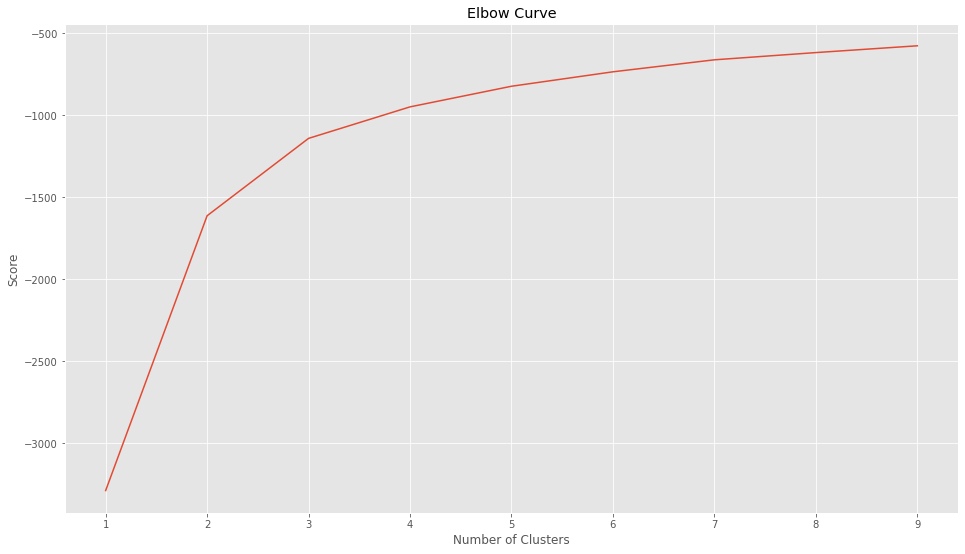

In [56]:
Nc = range(1, 10)




kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [57]:
# GENERAMOS CENTROIDES PARA 5 CLUSTERS
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 0.00000000e+00  2.04707921e-05 -2.13222410e-03 -1.96607141e-03
  -4.33522023e-03 -4.85064274e-03 -4.85064274e-03 -2.73351060e-03
  -2.39065340e-03  4.11401000e-03  4.38793811e-03  4.96311564e-03
   4.96311564e-03  7.70670828e-03 -3.39372489e-03 -4.76705302e-04
   1.14139134e-02  1.20780508e-02  1.23403322e-02  1.23403322e-02
   1.39363633e-02  1.59030112e-02  2.08851737e-02  1.98955950e-02
   2.25245919e-02  4.03463970e-02  4.15125889e-02  4.41522622e-02
   4.40288442e-02  3.31930103e-02  3.47185940e-02  3.47109559e-02
   3.51837521e-02  3.51837521e-02  5.77811541e-02  6.81611137e-02
   7.42096198e-02  7.42096198e-02  8.09374677e-02  1.03603216e-01
   1.03603216e-01  1.05294554e-01  1.07665364e-01  1.01591052e-01
   1.11175983e-01  1.14396252e-01  1.19728530e-01  1.20484630e-01
   1.54998788e-01  1.55091832e-01  1.56378086e-01  1.63622462e-01
   1.63622462e-01  1.65288744e-01  1.81723097e-01  2.10273759e-01
   2.13546114e-01  2.14172820e-01  2.28048601e-01  2.31547621e-01
   2.44037

In [58]:

#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([ 12, 154, 194, 312,  65])

In [59]:

for row in closest:
    print(row)
    print(Y[row])

12
ACEITE DE GIRASOL PUREZA X 1.5 LT.
154
DESODORANTE REXONA AEROSOL  HOMBRE X150ML
194
DETERGENTE GIGANTE ULTRA KIWI X 273 ML.
312
LECHE LARGA VIDA TREGAR DESCREMADA 0 % GRASA FORTI
65
ACONDICIONADOR DOVE REGEN EXTREMA SUPERIOR X 400 M


In [61]:
categoria=[]
for i in range(0,480):
    lugar=kmeans.predict( np.array( [ matriz_variacion_v1.iloc[i,:] ]  ) )
    lugar=list(lugar)
    categoria.append(lugar)

In [62]:
import itertools
categoria=list(itertools.chain(*categoria))
print(categoria)

[2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 3, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 0, 4, 0, 2, 0, 1, 1, 2, 1, 2, 2, 2, 4, 3, 0, 4, 2, 2, 2, 2, 2, 4, 2, 3, 0, 0, 3, 0, 3, 0, 0, 0, 2, 0, 3, 2, 2, 0, 2, 0, 0, 0, 0, 1, 3, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 3, 2, 0, 3, 0, 0, 0, 2, 3, 2, 0, 2, 0, 0, 0, 3, 3, 1, 2, 0, 3, 0, 0, 0, 3, 0, 2, 0, 2, 2, 0, 0, 3, 2, 3, 0, 0, 2, 3, 3, 1, 3, 2, 0, 2, 0, 3, 2, 0, 0, 2, 2, 2, 0, 2, 3, 0, 2, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 2, 2, 3, 2, 2, 2, 2, 2, 0, 3, 3, 3, 0, 2, 3, 3, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 3, 2, 2, 2, 0, 2, 3, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 3, 3, 0, 3, 0, 0, 0, 0, 3, 3, 2, 0, 0, 3, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 3, 0, 2, 2, 2, 2, 0, 4, 1, 3, 3, 3, 3, 3, 0, 0, 2, 0, 2, 3, 2, 0, 0, 2, 0, 0, 0, 2, 0, 3, 2, 3, 2, 2, 2, 2, 3, 0, 0, 0, 

In [66]:
PD_Categorias_K5= pd.DataFrame({'Productos':matriz_variacion_v1.index.values,'Categoria':categoria})

In [68]:
PD_Categorias.to_csv("KMEAN_5K_V1.csv")
PD_Categorias_K5

,Productos,Categoria
0,ACEITE DE GIRASOL ALSAMAR PC X 1.5 LT.,2
1,ACEITE DE GIRASOL CAÑUELAS PC X 1.5 LT.,2
2,ACEITE DE GIRASOL CAÑUELAS PC X 900 ML.,2
3,ACEITE DE GIRASOL COCINERO PC X 1.5 LT.,0
4,ACEITE DE GIRASOL COCINERO PC X 900 CC.,0
...,...,...
475,YOGUR SANCOR VIDA BEBIBLE DESCREMADO FRUTILLA...,0
476,bid_x,0
477,ask_x,0
478,bid_y,0


# Definimos una funcion para ejecutar las consultas para distintos valores de K



In [79]:


def analisis_kmean(matriz,k):
        # GENERAMOS CENTROIDES PARA 5 CLUSTERS
    kmeans = KMeans(n_clusters=k).fit(X)
    centroids = kmeans.cluster_centers_
    
    
    print("_"*20)
    print("-"*20)
    print("CENTROIDES PARA K = {}".format(k))
    print(centroids)
    
    
    #vemos el representante del grupo, el usuario cercano a su centroid
    closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
    print("_"*20)
    print("-"*20)
    print("REPRESENTANTES DE CADA GRUPO DE K = {}".format(k))
    print(closest)
    
    
    # Producto que representa a cada centroide
    print("_"*20)
    print("-"*20)
    
    for row in closest:
        print(Y[row])
    
    
    # Desarrollamos una lista de las categoria asociada a cada producto 
    categoria=[]
    for i in range(0,matriz.shape[0]):
        lugar=kmeans.predict( np.array( [ matriz.iloc[i,:] ]  ) )
        lugar=list(lugar)[0]
        categoria.append(lugar)
    
    PD_Categorias= pd.DataFrame({'Productos':matriz.index.values,'Categoria':categoria})
    
    PD_Categorias.to_csv("KMEAN_"+str(k)+"K_V1.csv")
    return PD_Categorias

In [80]:
analisis_kmean(matriz_variacion_v1,2)
analisis_kmean(matriz_variacion_v1,3)
analisis_kmean(matriz_variacion_v1,4)
analisis_kmean(matriz_variacion_v1,6)
analisis_kmean(matriz_variacion_v1,8)



____________________
--------------------
CENTROIDES PARA K = 2
[[ 0.00000000e+00  1.69406589e-21  1.14125582e-02  3.89856069e-02
   3.89856069e-02 -1.06447541e-03 -1.06447541e-03 -1.06447541e-03
  -1.06447541e-03  1.66860451e-01  1.56883929e-01  1.50993796e-01
   1.50993796e-01  1.37150166e-01  8.14514325e-02  8.64193091e-02
   1.73034568e-01  1.69478860e-01  1.69478860e-01  1.69478860e-01
   1.69478860e-01  2.00803535e-01  1.74122050e-01  1.74122050e-01
   2.12803911e-01  2.27732610e-01  2.27732610e-01  2.31603356e-01
   2.16670373e-01  1.93163708e-01  1.93163708e-01  1.93163708e-01
   1.81007765e-01  1.81007765e-01  4.59218723e-01  5.03156794e-01
   5.08423171e-01  5.08423171e-01  5.27868089e-01  5.93309665e-01
   5.93309665e-01  5.93798424e-01  6.29045896e-01  5.83196831e-01
   5.87876836e-01  6.35021741e-01  6.54961134e-01  6.54961134e-01
   6.71723530e-01  6.71723530e-01  6.76330462e-01  6.76330462e-01
   6.76330462e-01  6.69388259e-01  6.70899255e-01  6.99197408e-01
   6.9919740

____________________
--------------------
CENTROIDES PARA K = 4
[[ 0.00000000e+00 -1.01643954e-20 -2.30160387e-03 -2.14860586e-03
  -4.10160745e-03 -5.35889681e-04 -5.35889681e-04  1.45408232e-03
   1.79267291e-03  1.23134038e-02  1.28134422e-02  1.34169536e-02
   1.34169536e-02  1.64141730e-02  5.90174447e-03  1.03628022e-02
   2.39543087e-02  2.51446094e-02  2.54198110e-02  2.54198110e-02
   2.75480938e-02  2.96116209e-02  3.29553093e-02  3.10193308e-02
   3.37778349e-02  5.30236368e-02  5.42925742e-02  5.78292378e-02
   5.29141464e-02  4.71874810e-02  4.95764140e-02  4.95281623e-02
   5.00242489e-02  5.00242489e-02  7.53127955e-02  8.51810154e-02
   9.33251382e-02  9.33251382e-02  9.81624995e-02  1.22379224e-01
   1.22379224e-01  1.23190048e-01  1.26141171e-01  1.18383548e-01
   1.25757016e-01  1.29116514e-01  1.35090397e-01  1.35786910e-01
   1.77423081e-01  1.77501605e-01  1.78253027e-01  1.85854269e-01
   1.85854269e-01  1.86455268e-01  2.04825653e-01  2.36813560e-01
   2.3994765

____________________
--------------------
CENTROIDES PARA K = 8
[[ 0.00000000e+00 -5.08219768e-21  0.00000000e+00 -8.67361738e-19
   3.46944695e-18  3.73538371e-04  3.73538371e-04 -6.09141882e-03
  -6.09141882e-03 -5.14036987e-03 -4.84946078e-03 -4.84946078e-03
  -4.84946078e-03 -4.87403080e-03  1.72999494e-03 -1.42075412e-03
   4.89363120e-04  4.89363120e-04  4.89363120e-04  4.89363120e-04
   4.89363120e-04  4.89363120e-04 -1.32523940e-03 -2.84400185e-03
  -2.84400185e-03 -2.84400185e-03 -2.84400185e-03 -2.84400185e-03
  -3.16214427e-03 -5.00509653e-03 -4.97614459e-03 -2.30786411e-03
  -2.34609023e-03 -2.34609023e-03 -2.49863454e-03  1.53500301e-03
   3.30763299e-03  3.30763299e-03  6.22436396e-03  1.45469050e-02
   1.45469050e-02  1.45469050e-02  1.45469050e-02  1.09399646e-02
   8.12412837e-03  8.12412837e-03  8.12412837e-03  8.12412837e-03
   1.01658821e-02  1.01658821e-02  1.06883481e-02  4.33159902e-03
   4.88460685e-03  5.63590892e-03  9.44949263e-03  2.32648534e-02
   2.5173740

,Productos,Categoria
0,ACEITE DE GIRASOL ALSAMAR PC X 1.5 LT.,0
1,ACEITE DE GIRASOL CAÑUELAS PC X 1.5 LT.,7
2,ACEITE DE GIRASOL CAÑUELAS PC X 900 ML.,0
3,ACEITE DE GIRASOL COCINERO PC X 1.5 LT.,7
4,ACEITE DE GIRASOL COCINERO PC X 900 CC.,7
...,...,...
475,YOGUR SANCOR VIDA BEBIBLE DESCREMADO FRUTILLA...,7
476,bid_x,3
477,ask_x,3
478,bid_y,7
